In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
from dsn.util.systems import SCCircuit
from dsn.util.dsn_util import get_savedir, get_system_from_template
from dsn.util.plot_util import assess_constraints, plot_opt, dsn_pairplots, \
                               pairplot, lin_reg_plot
from tf_util.stat_util import approx_equal
import matplotlib.backends.backend_pdf
import os

In [2]:
EPS = 1e-16

p = 0.6
std = 0.05
var = std**2
inact_str = "NI"

dirstr = 'SC_WTA_%s/' % inact_str

param_dict = {
    "behavior_type":"WTA",
    "p":p,
    "var":var,
    "inact_str":inact_str,
    }

system = get_system_from_template('SCCircuit', param_dict)

# normalizing flow layer architecture
flow_type = 'PlanarFlow'
K = 1
sigma0 = 1.0
# number of layers
nlayers = 10
mult_and_shift = 'post'
arch_dict = {'D':system.D, \
             'K': 1, \
             'sigma0':sigma0, \
             'post_affine':True, \
             'flow_type':flow_type, \
             'shared':False, \
             'repeats':nlayers};
lr_order = -3



# multivariate normal initialization variance
sigma_init = 1.0
c_init_order = 4

start_rs = 1
num_rs = 5
random_seeds = np.arange(start_rs, num_rs+start_rs)


0 /Users/sbittner/Documents/dsn/dsn/models/SC_WTA_NI//SCCircuit_D=8_WTA_mu=6.00E-01_6.00E-01_2.50E-03_2.50E-03_0.00E+00_0.00E+00_1.00E+00_1.00E+00_flow=10P_M_A_sigma=1.00_c=4_rs=1/
1 /Users/sbittner/Documents/dsn/dsn/models/SC_WTA_NI//SCCircuit_D=8_WTA_mu=6.00E-01_6.00E-01_2.50E-03_2.50E-03_0.00E+00_0.00E+00_1.00E+00_1.00E+00_flow=10P_M_A_sigma=1.00_c=4_rs=2/
2 /Users/sbittner/Documents/dsn/dsn/models/SC_WTA_NI//SCCircuit_D=8_WTA_mu=6.00E-01_6.00E-01_2.50E-03_2.50E-03_0.00E+00_0.00E+00_1.00E+00_1.00E+00_flow=10P_M_A_sigma=1.00_c=4_rs=3/
3 /Users/sbittner/Documents/dsn/dsn/models/SC_WTA_NI//SCCircuit_D=8_WTA_mu=6.00E-01_6.00E-01_2.50E-03_2.50E-03_0.00E+00_0.00E+00_1.00E+00_1.00E+00_flow=10P_M_A_sigma=1.00_c=4_rs=4/
4 /Users/sbittner/Documents/dsn/dsn/models/SC_WTA_NI//SCCircuit_D=8_WTA_mu=6.00E-01_6.00E-01_2.50E-03_2.50E-03_0.00E+00_0.00E+00_1.00E+00_1.00E+00_flow=10P_M_A_sigma=1.00_c=4_rs=5/


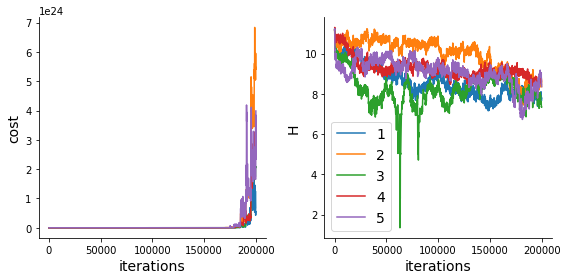

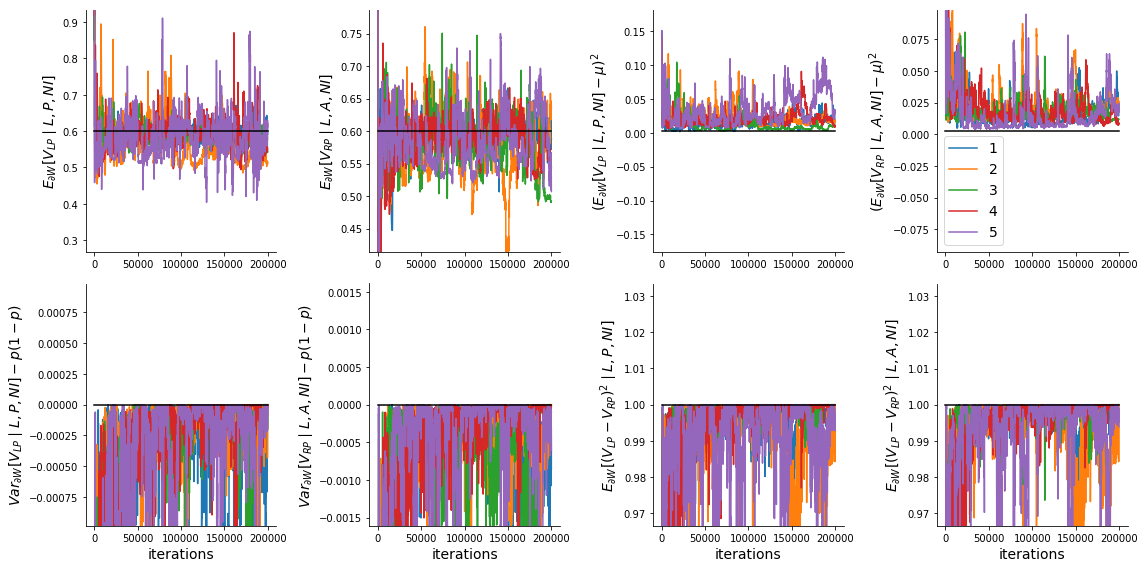

In [3]:
basedir = '/Users/sbittner/Documents/dsn/dsn/'
model_dirs = []
legendstrs = []
AL_final_its = []
fnames = []
for i in range(num_rs):
    random_seed = random_seeds[i]
    dsndir = basedir + get_savedir(system, arch_dict, sigma_init, c_init_order, random_seed, dirstr)
    model_dirs.append(dsndir)
    fnames.append(dsndir + 'opt_info.npz')
    
#legendstrs = np.arange(start_rs, start_rs+num_rs+1)
legendstrs = np.arange(start_rs, start_rs+num_rs+1)
ptol = 0.02
contol = 0.05
vartol = 0.02

if (p==1.0):
    tol = np.array([ptol, ptol, ptol, ptol, contol, contol, contol, contol])
    tol_inds = [0,1,2,3,4,5,6,7]
else:
    tol = np.array([contol, contol, contol, contol])
    tol_inds = [4,5,6,7]
    #tol = np.array([vartol, vartol, contol, contol, contol, contol])
    #tol_inds = [2,3,4,5,6,7]
figs, ME_its = plot_opt(model_dirs, legendstrs, con_method='mix', 
                              maxconlim=0.5, alpha=0.05, frac_samps=0.5, 
                              tol=tol, tol_inds=tol_inds, 
                              T_x_labels=system.T_x_labels)


In [33]:
print(ME_its)

[None, None, None, None, None]


In [24]:
#pfnames = ['images/Z_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
Zs = dsn_pairplots(model_dirs, 'Zs', system, system.D, f_str='identity', \
              c_str='log_q_z', legendstrs=legendstrs, AL_final_its=ME_its, \
              fontsize=14, ellipses=False, tri=True) #3, pfnames=pfnames)


0
1 has not converged so not plotting.
1
2 has not converged so not plotting.
2
3 has not converged so not plotting.
3
4 has not converged so not plotting.
4
5 has not converged so not plotting.


UnboundLocalError: local variable 'axs' referenced before assignment

In [ ]:
#pfnames = ['images/T_x_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
T_xs = dsn_pairplots(model_dirs, 'T_xs', system, system.num_suff_stats, f_str='identity', \
              c_str='log_q_z', legendstrs=legendstrs, AL_final_its=ME_its, figsize=(15,15), \
              fontsize=12, ellipses=False, tri=True) #, pfnames=pfnames)        

